# Medical Images

Rather than using a camera to take images, there are many medical devices that can acquire images useful for the detection and diagnosis of diseases.

These can be 2D (X-ray) or 3D (MRI). On this course, we will focus on images from **M**agnetic **R**esonance **I**maging (**MRI**).

<img src="https://sdbif.org/index/wp-content/uploads/2020/02/Head_Scans2.jpg" alt="Drawing" align="middle" width="500px"/>

We use the same pixel (or voxel) information discussed in previous notebooks to visualise biological properties in living people. 

In order to visualise our images, first we need to transfer them from the scanner to our computer.

# From the scanner to our computer

## Neuroimaging file formats

|Format Name | File Extension | Origin |
|---|---|---|
| DICOM | none | ACR/NEMA Consortium |
| Analyze | .img/.hdr | Analyze Software, Mayo Clinic |
| NIfTI | .nii | Neuroimaging Informatics Technology Initiative |
| MINC | .mnc | Montreal Neurological Institute |
| NRRD | .nrrd | |

From the MRI scanner, images are initially collected in the DICOM format and can be converted to these other formats to make working with the data easier.

<img src="../fig/dicom_to_nifti.png" alt="Drawing" align="middle" width="600px"/>

We will look at some DICOM data that was generously shared publicly by the [Princeton Handbook for Reproducible Neuroimaging](https://brainhack-princeton.github.io/handbook/).

Here we will just use the DICOM data for the anatomical scans. These have already been downloaded for you here:

`data/dicom_examples/0219191_mystudy-0219-1114_anat.tar.gz`

We can use commands from the UNIX terminal in a jupyter notebook by putting `%%bash` at the top of a code cell.
Lets use a UNIX terminal command to list files in the directory.

In [23]:
%%bash
ls

01-2d-images.ipynb
02-3d-images.ipynb
03-medical-images-scanner-to-computer.ipynb
04-mri-modalities.ipynb
05-image-registration.ipynb
06-sMRI-image-cleanup.ipynb
07-spatial-norm.ipynb
08-sMRI-segmentation-parcellation.ipynb
09-sMRI-stats-reproducibility.ipynb
sMRI_reproducibility.ipynb


We will use UNIX commands to convert DICOM data into NIfTI format. This will allow us to easily work with the images. 

In [25]:
%%bash

# first lets create a new directory for the dicoms
mkdir ../data/dicom_examples/dicoms

# Decompress the DICOM data into our new dicom directory
tar -xvzf ../data/dicom_examples/0219191_mystudy-0219-1114_anat.tar.gz -C ../data/dicom_examples/dicoms

x 5-1-1.dcm
x 5-10-1.dcm
x 5-100-1.dcm
x 5-101-1.dcm
x 5-102-1.dcm
x 5-103-1.dcm
x 5-104-1.dcm
x 5-105-1.dcm
x 5-106-1.dcm
x 5-107-1.dcm
x 5-108-1.dcm
x 5-109-1.dcm
x 5-11-1.dcm
x 5-110-1.dcm
x 5-111-1.dcm
x 5-112-1.dcm
x 5-113-1.dcm
x 5-114-1.dcm
x 5-115-1.dcm
x 5-116-1.dcm
x 5-117-1.dcm
x 5-118-1.dcm
x 5-119-1.dcm
x 5-12-1.dcm
x 5-120-1.dcm
x 5-121-1.dcm
x 5-122-1.dcm
x 5-123-1.dcm
x 5-124-1.dcm
x 5-125-1.dcm
x 5-126-1.dcm
x 5-127-1.dcm
x 5-128-1.dcm
x 5-129-1.dcm
x 5-13-1.dcm
x 5-130-1.dcm
x 5-131-1.dcm
x 5-132-1.dcm
x 5-133-1.dcm
x 5-134-1.dcm
x 5-135-1.dcm
x 5-136-1.dcm
x 5-137-1.dcm
x 5-138-1.dcm
x 5-139-1.dcm
x 5-14-1.dcm
x 5-140-1.dcm
x 5-141-1.dcm
x 5-142-1.dcm
x 5-143-1.dcm
x 5-144-1.dcm
x 5-145-1.dcm
x 5-146-1.dcm
x 5-147-1.dcm
x 5-148-1.dcm
x 5-149-1.dcm
x 5-15-1.dcm
x 5-150-1.dcm
x 5-151-1.dcm
x 5-152-1.dcm
x 5-153-1.dcm
x 5-154-1.dcm
x 5-155-1.dcm
x 5-156-1.dcm
x 5-157-1.dcm
x 5-158-1.dcm
x 5-159-1.dcm
x 5-16-1.dcm
x 5-160-1.dcm
x 5-161-1.dcm
x 5-162-1.dcm
x 5-163-1.dcm
x

NIfTI is one of the most ubiquitous file formats for storing neuroimaging data.
If you're interested in learning more about NIfTI images, we highly recommend [this blog post about the NIfTI format](http://brainder.org/2012/09/23/the-nifti-file-format/).

We can convert our DICOM data to NIfTI using a UNIX command called [dcm2niix](https://github.com/rordenlab/dcm2niix).

We can learn how to run `dcm2niix` by taking a look at its help menu.

In [26]:
%%bash

dcm2niix -help

Compression will be faster with 'pigz' installed http://macappstore.org/pigz/
Chris Rorden's dcm2niiX version v1.0.20211006  Clang11.1.0 x86-64 (64-bit MacOS)
usage: dcm2niix [options] <in_folder>
 Options :
  -1..-9 : gz compression level (1=fastest..9=smallest, default 6)
  -a : adjacent DICOMs (images from same series always in same folder) for faster conversion (n/y, default n)
  -b : BIDS sidecar (y/n/o [o=only: no NIfTI], default y)
   -ba : anonymize BIDS (y/n, default y)
  -c : comment stored in NIfTI aux_file (provide up to 24 characters e.g. '-c first_visit')
  -d : directory search depth. Convert DICOMs in sub-folders of in_folder? (0..9, default 5)
  -e : export as NRRD (y) or MGH (o) instead of NIfTI (y/n/o, default n)
  -f : filename (%a=antenna (coil) name, %b=basename, %c=comments, %d=description, %e=echo number, %f=folder name, %g=accession number, %i=ID of patient, %j=seriesInstanceUID, %k=studyInstanceUID, %m=manufacturer, %n=name of patient, %o=mediaObjectInstanceUI

### Converting DICOM to NIfTI
When converting DICOM files to NIfTI format, we often want to:
1. Create a new folder for the NIfTI files (e.g. `data/dicom_examples/nii`)
2. Use `dcm2niix` while:
    + Compressing the NIfTI files to save space.
    + Output them in the NIfTI folder created above

Can you use the `dcm2niix` command to convert the DICOMS we downloaded into NIfTI format? Use commands from the `%%bash` cells and the `dcm2niix` help information above to help you.


<b>EXERCISE:</b> Convert the Princeton DICOM data to NIfTI

Solution

In [27]:
%%bash

# make the nii directory 
mkdir -p ../data/dicom_examples/nii

# convert dicom to nifti
dcm2niix -z y -o ../data/dicom_examples/nii ../data/dicom_examples/dicoms

Compression will be faster with 'pigz' installed http://macappstore.org/pigz/
Chris Rorden's dcm2niiX version v1.0.20211006  Clang11.1.0 x86-64 (64-bit MacOS)
Found 192 DICOM file(s)
Convert 192 DICOM as ../data/dicom_examples/nii/dicoms_anat_ses-01_T1w_20190219111436_5 (256x256x192x1)
Conversion required 2.335317 seconds (2.293819 for core code).


Now let's take a look at the NIfTI files!

In [28]:
%%bash 

ls ../data/dicom_examples/nii

dicoms_anat_ses-01_T1w_20190219111436_5.json
dicoms_anat_ses-01_T1w_20190219111436_5.nii.gz


There is one NIfTI file that we compressed ending in .nii.gz

There is one json file associated with the NIfTI file that gives information about the image. This ends in .json

# Reading NIfTI images

There are 3 key parts to a NIfTI image:
1. The Header
2. The Data
3. The Affine

We will explore these below.

[NiBabel](http://nipy.org/nibabel/) is a Python package for reading and writing neuroimaging data. To learn more about how NiBabel handles NIfTIs, check out the [Working with NIfTI images](http://nipy.org/nibabel/nifti_images.html) page of the NiBabel documentation.

In [29]:
import nibabel as nib

First, use the `load()` function to create a NiBabel image object from a NIfTI file. We'll load in an example T1w image from the zip file we just downloaded.

In [31]:
t1_img = nib.load("../data/dicom_examples/nii/dicoms_anat_ses-01_T1w_20190219111436_5.nii.gz")

### 1. [Header](http://nipy.org/nibabel/nibabel_images.html#the-image-header): contains metadata about the image, such as image dimensions, data type, etc.

In [32]:
t1_hdr = t1_img.header
print(t1_hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 192 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.         0.90000004 0.859375   0.859375   2.3        0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=3.1;Time=112922.273;phase=1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.15146269
quatern_c       : 0.011705771
quatern_d       : -0.0024157318
qoffset

`t1_hdr` is a Python **dictionary**. Dictionaries are containers that hold pairs of objects - keys and values. Let's take a look at all of the keys.
Similar to `t1_img` in which attributes can be accessed by typing `t1_img.` and hitting <kbd>Tab</kbd>, you can do the same with `t1_hdr`. In particular, we'll be using a **method** belonging to `t1_hdr` that will allow you to view the keys associated with it.

In [33]:
t1_hdr.keys()

['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

Notice that **methods** require you to include `()` at the end of them whereas **attributes** do not.
The key difference between a method and an attribute is:
- Attributes are *stored values* kept within an object
- Methods are *processes* that we can run using the object. Usually a method takes attributes, performs an operation on them, then returns it for you to use.

When you type in `t1_img.` followed by <kbd>Tab</kbd>, you'll see that attributes are highlighted in <span style="color:orange"> orange </span> and methods highlighted in <span style="color:blue"> blue </span>.

The output above is a list of **keys** you can use from `t1_hdr` to access **values**. We can access the value stored by a given key by typing:

```python
t1_hdr['<key_name>']
```

<b>EXERCISE:</b> Extract the value of <code>pixdim</code> from <code>t1_hdr</code>

Solution

In [34]:
t1_hdr['pixdim']

array([1.        , 0.90000004, 0.859375  , 0.859375  , 2.3       ,
       0.        , 0.        , 0.        ], dtype=float32)

In addition to metadata embedded in the NIfTI header, the T1w image also has a corresponding JSON file with additional scan acquisition details. Using the JSON file to store this information is a concept added by BIDS (which we'll cover in the next lesson) to log the important bits of information that traditionally get excluded from the NIfTI header.

Let's take a look at it below:

In [36]:
import json

with open("../data/dicom_examples/nii/dicoms_anat_ses-01_T1w_20190219111436_5.json", "r") as f:
    t1_metadata = json.load(f)

t1_metadata

{'Modality': 'MR',
 'MagneticFieldStrength': 3,
 'ImagingFrequency': 123.249,
 'Manufacturer': 'Siemens',
 'ManufacturersModelName': 'Skyra',
 'InstitutionName': 'Princeton University - Neuroscience Institute',
 'InstitutionalDepartmentName': 'Department',
 'InstitutionAddress': 'Washington and Faculty Rd. - Building 25 25,Princeton,NJ,US,08540',
 'DeviceSerialNumber': '45031',
 'StationName': 'AWP45031',
 'BodyPartExamined': 'BRAIN',
 'PatientPosition': 'HFS',
 'ProcedureStepDescription': 'Norman_Mennen^5516_greenEyes',
 'SoftwareVersions': 'syngo MR E11',
 'MRAcquisitionType': '3D',
 'SeriesDescription': 'anat_ses-01_T1w',
 'ProtocolName': 'anat_ses-01_T1w',
 'ScanningSequence': 'GR\\IR',
 'SequenceVariant': 'SK\\SP\\MP',
 'ScanOptions': 'IR',
 'SequenceName': '*tfl3d1_16ns',
 'ImageType': ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM'],
 'SeriesNumber': 5,
 'AcquisitionTime': '11:29:22.272500',
 'AcquisitionNumber': 1,
 'SliceThickness': 0.9,
 'SAR': 0.0790489,
 'EchoTime': 0.00308,
 'Re

The additional metadata are also in the form of a Python <b>dictionary</b>.

<b>EXERCISE:</b> Extract the value of <code>SliceThickness</code> from <code>t1_metadata</code> similar to how you did previously for <code>t1_hdr</code>.

In [37]:
t1_metadata["SliceThickness"]

0.9

### 2. Data
As you've seen above, the header contains useful information that gives us information about the properties (metadata) associated with the MR data we've loaded in. Now we'll move in to loading the actual *image data itself*. We can achieve this by using the *method* called `t1_img.get_fdata()`.

In [38]:
t1_data = t1_img.get_fdata()
t1_data

array([[[ 4.,  7.,  3., ...,  3.,  3.,  0.],
        [ 1.,  6.,  2., ...,  2.,  4.,  0.],
        [ 4.,  4.,  2., ...,  6.,  5.,  0.],
        ...,
        [ 6.,  1.,  9., ...,  3.,  6.,  0.],
        [ 2.,  3.,  6., ...,  7.,  2.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 4.,  5.,  0., ...,  3.,  1.,  0.],
        [ 2.,  1.,  8., ...,  4.,  1.,  0.],
        [ 5.,  1.,  8., ...,  3.,  4.,  0.],
        ...,
        [10., 19.,  2., ...,  0.,  2.,  0.],
        [ 5.,  3.,  3., ...,  3.,  4.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 1.,  2.,  3., ...,  2.,  1.,  0.],
        [ 2.,  4.,  9., ...,  2.,  8.,  0.],
        [ 7.,  7.,  9., ...,  4.,  4.,  0.],
        ...,
        [ 1.,  2.,  9., ...,  1.,  0.,  0.],
        [ 5.,  8.,  7., ...,  2.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 7.,  2.,  4., ...,  1.,  3.,  0.],
        [ 7.,  4.,  5., ...,  3.,  4.,  0.],
        [ 7.,  3.,  9., ...,  3.,  3.,  0.

What type of data is this exactly? We can determine this by calling the `type()` function on `t1_data`.

In [39]:
type(t1_data)

numpy.ndarray

The data is a multidimensional **array** representing the image data. In Python, an array is used to store lists of numerical data into something like a table.

<b>EXERCISE:</b> Let's check out some *attributes* of the array. How can we see the number of dimensions in the <code>t1_data</code> array? What about the how big each dimension is (shape)? Once again, all of the attributes of the array can be seen by typing `t1_data.` and <kbd>Tab</kbd>.

In [40]:
t1_data.ndim

3

`t1_data` contains 3 dimensions. You can think of the data as a 3D version of a picture (more accurately, a volume).

<img src="../fig/numpy_arrays.png" alt="Drawing" align="middle" width="600px"/>

While typical 2D pictures are made out of squares called **pixels**, a 3D MR image is made up of 3D cubes called **voxels**.

<img src="http://www.sprawls.org/mripmt/MRI10/MR10-2.jpg" alt="Drawing" align="middle" width="500px"/>

**Note:** MRI can be acquired in any orientation, so thickness above may relate to another dimension!

In [41]:
t1_data.shape

(192, 256, 256)

The 3 numbers given here represent the number of values *along a respective dimension (x,y,z)*. This brain was scanned in 192 slices with a resolution of 256 x 256 voxels per slice. That means there are:

$$x * y * z = value$$
$$ 192 * 256 * 256 = 12582912$$ voxels in total!

Let's see the type of data inside of the array.

In [42]:
t1_data.dtype

dtype('float64')

This tells us that each element in the array (or voxel) is a floating-point number.   
The data type of an image controls the range of possible intensities. As the number of possible values increases, the amount of space the image takes up in memory also increases.

In [43]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

print(np.min(t1_data))
print(np.max(t1_data))

0.0
1964.0


For our data, the range of intensity values goes from 0 (black) to more positive digits (whiter).

How do we examine what value a particular voxel is? We can inspect the value of a voxel by selecting an **index** as follows:

~~~python
data[x,y,z]
~~~

So for example we can inspect a voxel at coordinates (10,20,3) by doing the following:

In [44]:
t1_data[9, 19, 2]

8.0

**NOTE**: Python uses **zero-based indexing**. The first item in the array is item 0. The second item is item 1, the third is item 2, etc.

This yields a single value representing the intensity of the signal at a particular voxel! Next we'll see how to not just pull one voxel but a slice or an *array* of voxels for visualization and analysis!

## Working With Image Data

Slicing does exactly what it seems to imply. Giving our 3D volume, we pull out a 2D slice of our data. Here's an example of slicing from left to right (**sagittal slicing**):

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Parasagittal_MRI_of_human_head_in_patient_with_benign_familial_macrocephaly_prior_to_brain_injury_%28ANIMATED%29.gif"/>

This gif is a series of 2D images or **slices** moving from left to right.

Let's pull the 50th slice in the x axis.

In [45]:
x_slice = t1_data[49, :, :]

This is similar to the indexing we did before to pull out a single voxel. However, instead of providing a value for each axis, the `:` indicates that we want to grab *all* values from that particular axis.

<b>EXERCISE:</b> Now try selecting the 80th slice from the y axis.

In [46]:
y_slice = t1_data[:, 79, :]

<b>EXERCISE:</b> Finally try grabbing the 100th slice from the z axis.

In [47]:
z_slice = t1_data[:, :, 99]

We've been slicing and dicing brain images but we have no idea what they look like! In the next section we'll show you how you can visualize brain slices!

## Visualizing

We previously inspected the signal intensity of the voxel at coordinates (10,20,3). Let's see what out data looks like when we slice it at this location. We've already indexed the data at each x, y, and z axis. Let's use `matplotlib`, Python's standard plotting library.

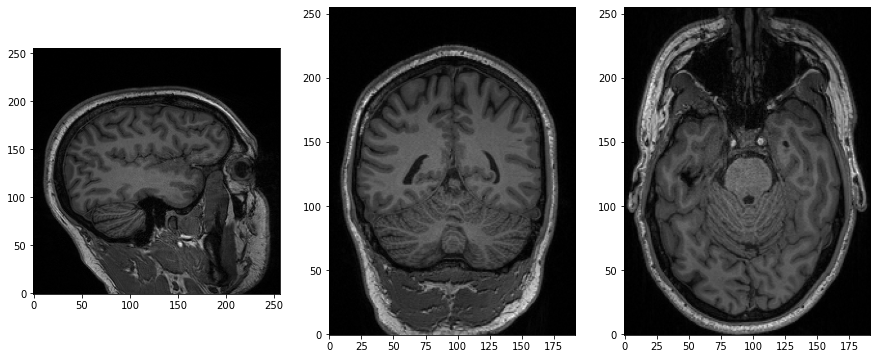

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices), figsize=(15,15))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

An upgrade from `matplotlib` is `nilearn`, which provides several advanced plotting features for neuroimaging data.

/opt/anaconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:85: UserWarning: choosing both vmin and a threshold is not allowed; setting vmin to 0
  warnings.warn('choosing both vmin and a threshold is not allowed; '
/opt/anaconda3/lib/python3.9/site-packages/nilearn/plotting/html_stat_map.py:217: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()
/opt/anaconda3/lib/python3.9/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))



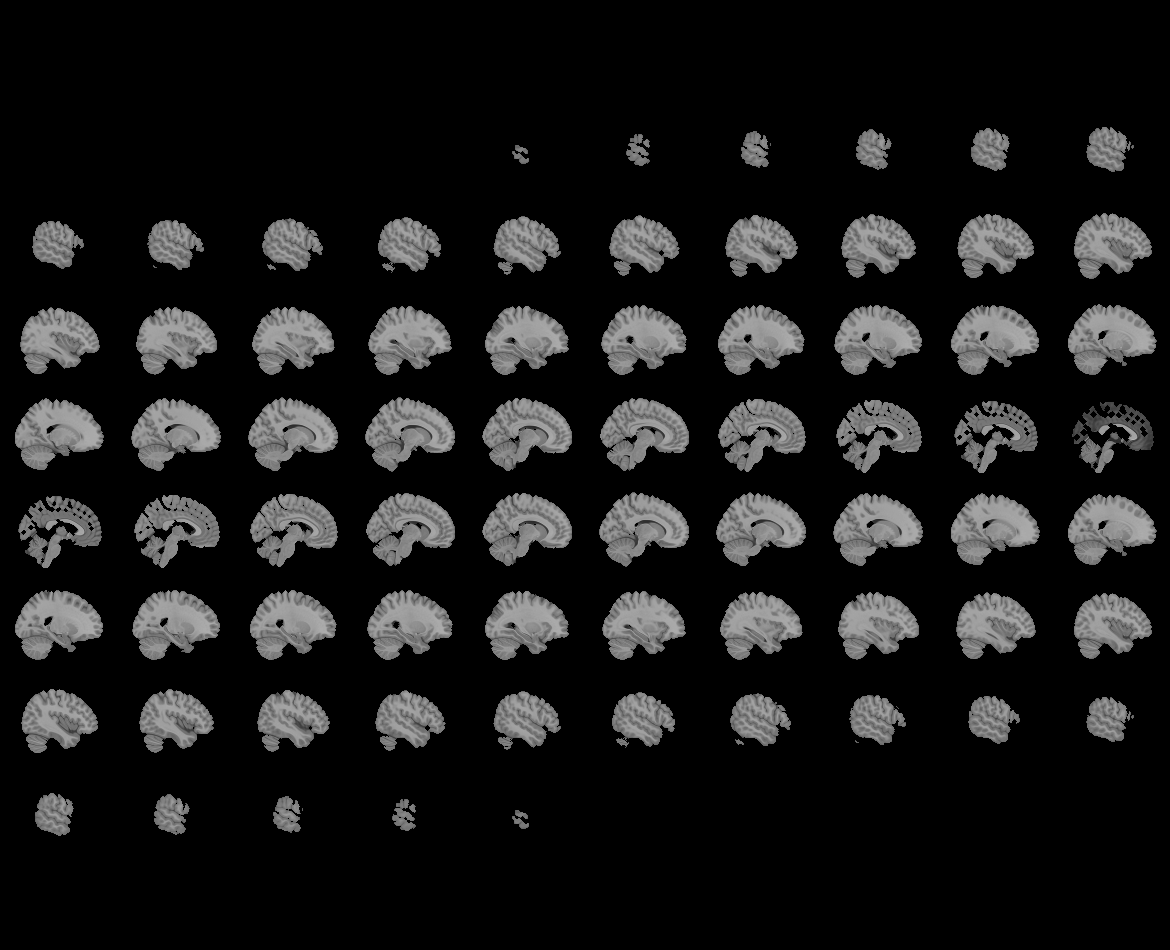
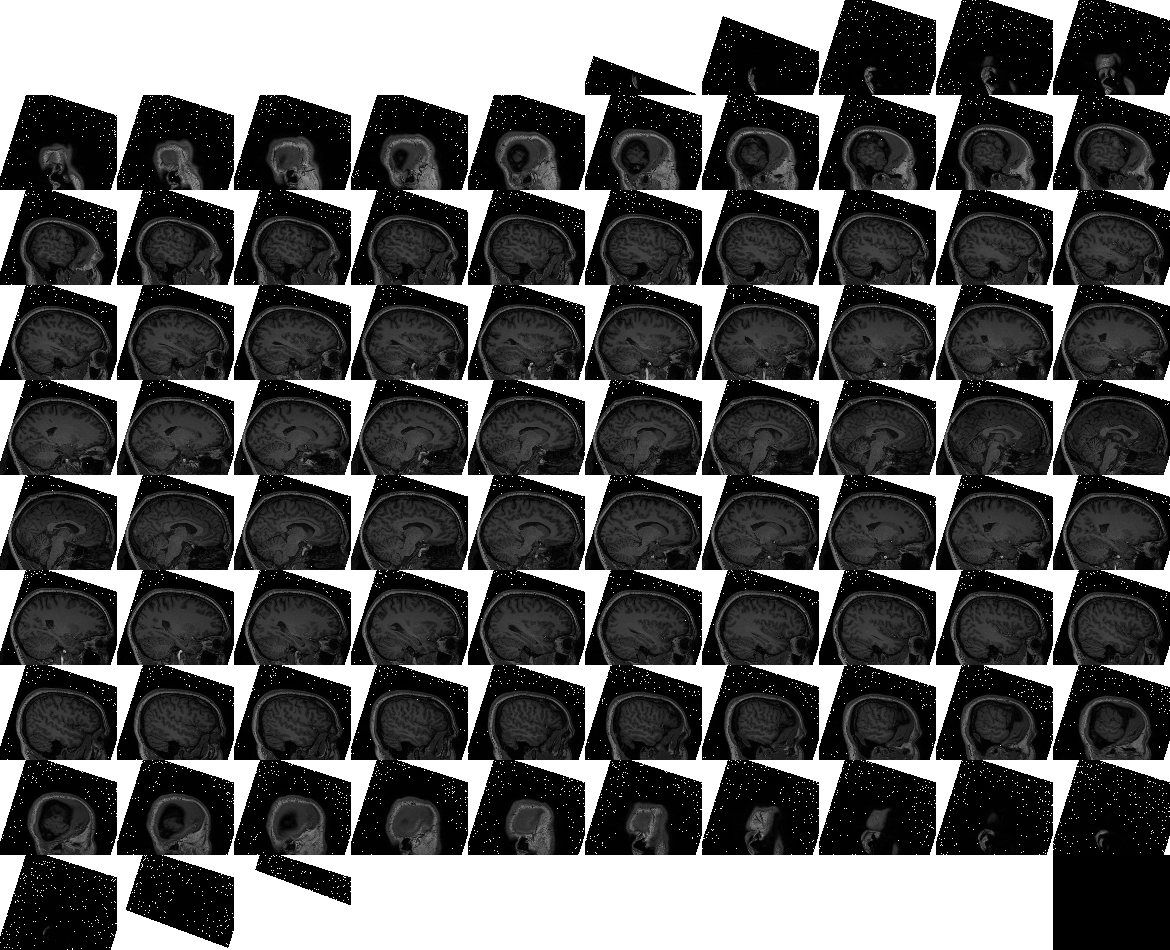

In [49]:
from nilearn import plotting

plotting.view_img(t1_img, black_bg=True, colorbar=False, cmap="gray", symmetric_cmap=False, vmin=0)

Try dragging your mouse to view the MRI data interactively!

Now, we're going to step away from discussing our data and briefly mention the final important attribute of a NIfTI.

### 3. [Affine](http://nipy.org/nibabel/coordinate_systems.html): tells the position of the image array data in a *reference space*

The final important piece of metadata associated with an image file is the **affine matrix**. Below is the affine matrix for our data.

In [50]:
t1_affine = t1_img.affine
t1_affine

array([[   0.9  ,    0.001,    0.021,  -90.05 ],
       [  -0.007,    0.82 ,    0.257, -143.966],
       [  -0.02 ,   -0.257,    0.82 ,  -76.791],
       [   0.   ,    0.   ,    0.   ,    1.   ]])

The affine matrix allows us to move between voxel coordinates (x,y,z) and world space coordinates (left/right,bottom/top,back/front). This allows us to understand how the image relates to how someone lay in the MRI scanner and contains important orientation information.

Don't worry if this doesn't make sense right now, we will cover this in more detail in later notebooks!